In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
categorical_value = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
mode = df[categorical_value].mode().iloc[0]
df[categorical_value] = df[categorical_value].fillna(mode)

In [15]:
numerical_columns = ['Age', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck']
mean = df[numerical_columns].mean()
df[numerical_columns] = df[numerical_columns].fillna(mean)

In [16]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Number            0
Side              0
dtype: int64

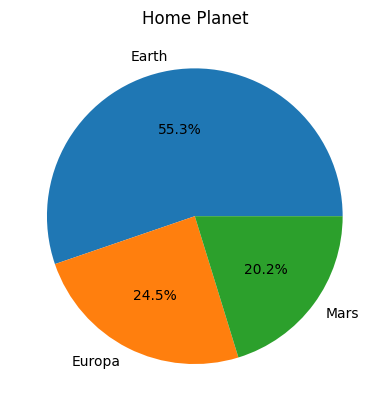

In [6]:
planets = df['HomePlanet'].value_counts()
plt.pie(planets, labels = planets.index, autopct = '%1.1f%%')
plt.title('Home Planet')
plt.show()

In [7]:
passengers_transported = df['Transported'].value_counts()
passengers_transported

Transported
True     4378
False    4315
Name: count, dtype: int64

In [8]:
Planet_transported = df[['HomePlanet','Transported']].sort_values(by=['Transported'],ascending=False).head(10)
Planet_transported['HomePlanet'].value_counts()

HomePlanet
Earth     5
Mars      3
Europa    2
Name: count, dtype: int64

In [9]:
Planet_transported

,HomePlanet,Transported
4346,Earth,True
4820,Mars,True
4833,Europa,True
4832,Europa,True
4829,Mars,True
4828,Earth,True
4826,Earth,True
4825,Earth,True
4824,Earth,True
4823,Mars,True


In [10]:

string=df['Cabin'].str.split('/')
df['Deck']=string.map(lambda string:string[0])
df['Number']=string.map(lambda string:string[1])
df['Side']=string.map(lambda string:string[2])

In [11]:
df.drop(columns = ['Cabin', 'Number', 'Name'])

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S
